<a href="https://colab.research.google.com/github/JoDeMiro/FuzzyBevezetes/blob/main/Python_Fuzzy_Aggregation_Logic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
# https://github.com/JoDeMiro/FuzzyLogic

In [57]:
%%capture
!pip install scikit-fuzzy

In [58]:
import numpy as np
import skfuzzy as fuzzy
from skfuzzy import control as ctrl

import ipywidgets as widgets
import matplotlib.pyplot as plt

from ipywidgets import IntSlider
from ipywidgets import HTML
from ipywidgets import interact, interactive, fixed, interact_manual

Ezt próbálom valahogy modellezni.

https://youtu.be/qdeA6OO04ZI?t=953

Ez egy különlegesen fontos rész, tulajdonképpen ezen van a hangsúly.

https://youtu.be/qdeA6OO04ZI?t=953

Arra vagyok kíváncsi, hogyha a négy szabályból bármelyik vagy valamelyik kettő azonos kimeneti tagsági függvényhez van kötve, akkor mi alapján döntjük el, hogy melyik illetékességi szintjét kapja meg, ha a kettő nem azonos.

Ezt fogom vizsgálni


In [59]:
# Create universe

dirt         = ctrl.Antecedent(np.arange(0, 100.1, 0.1), 'dirt')

grease       = ctrl.Antecedent(np.arange(0, 100.1, 0.1), 'grease')

washtime     = ctrl.Consequent(np.arange(0, 60.1, 0.1), 'washtime')

In [60]:
washtime.defuzzify_method = 'centroid'
washtime.universe.mean()

30.0

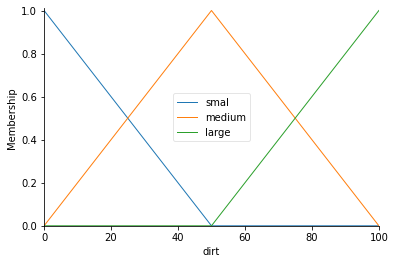

In [61]:
# Határozzuk meg a tagsági függvényeket (ez esetben most a dirt)

dirt['smal']   = fuzzy.trimf(dirt.universe, [0, 0, 50])
dirt['medium'] = fuzzy.trimf(dirt.universe, [0, 50, 100])
dirt['large']  = fuzzy.trimf(dirt.universe, [50, 100, 100])

dirt.view()

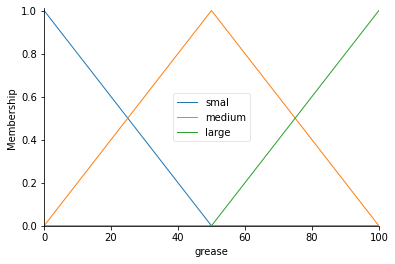

In [62]:
# Határozzuk meg a tagsági függvényeket (ez esetben most a grease)

grease['smal']   = fuzzy.trimf(grease.universe, [0, 0, 50])
grease['medium'] = fuzzy.trimf(grease.universe, [0, 50, 100])
grease['large']  = fuzzy.trimf(grease.universe, [50, 100, 100])

grease.view()

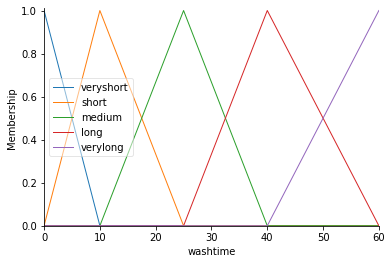

In [63]:
# Most készítsük el a Washtime változó tagsági függvyényeit is.

washtime['veryshort'] = fuzzy.trimf(washtime.universe, [0, 0, 10])
washtime['short']     = fuzzy.trimf(washtime.universe, [0, 10, 25])
washtime['medium']    = fuzzy.trimf(washtime.universe, [10, 25, 40])
washtime['long']      = fuzzy.trimf(washtime.universe, [25, 40, 60])
washtime['verylong']  = fuzzy.trimf(washtime.universe, [40, 60, 60])

washtime.view()

In [64]:
# Most készítsük el a szabályokat

# Hozzáteszem ez nem teljes szabályrendszer lesz
# Ez egy hiányos szabály rendszer
# Itt csak a dok elején meghatározott kérdést akarom megvizsálni

rule1 = ctrl.Rule(antecedent= dirt['medium'] & grease['medium'], consequent = washtime['short'])

rule2 = ctrl.Rule(antecedent= dirt['medium'] & grease['large'], consequent = washtime['medium'])     # Ez a két szabály ad azonos kimenetet

rule3 = ctrl.Rule(antecedent= dirt['large']  & grease['medium'], consequent = washtime['medium'])    # Ez a két szabály ad azonos kimenetet

rule4 = ctrl.Rule(antecedent= dirt['large']  & grease['large'], consequent = washtime['long'])

# rule4 = ctrl.Rule(antecedent= bemenet1['high'] | bemenet2['warm'], consequent = kimenet['increase'])


In [65]:
def fuzzyDemo(dirt_ = 60, grease_ = 70):

  # a szabályok
  print(rule1)
  print(rule2)
  print(rule3)
  print(rule4)

  # négy szabályunk van
  system = ctrl.ControlSystem([rule1, rule2, rule3, rule4])

  simulation = ctrl.ControlSystemSimulation(system)

  simulation.input['dirt'] = dirt_
  simulation.input['grease'] = grease_

  simulation.compute()

  print('------------------------------------------')
  print('washtime  :', simulation.output['washtime'])
  print('------------------------------------------')
  print(simulation.input)

  washtime.view(sim = simulation)
  dirt.view(sim = simulation)
  grease.view(sim = simulation)
  
  return simulation


IF dirt[medium] AND grease[medium] THEN washtime[short]
	AND aggregation function : fmin
	OR aggregation function  : fmax
IF dirt[medium] AND grease[large] THEN washtime[medium]
	AND aggregation function : fmin
	OR aggregation function  : fmax
IF dirt[large] AND grease[medium] THEN washtime[medium]
	AND aggregation function : fmin
	OR aggregation function  : fmax
IF dirt[large] AND grease[large] THEN washtime[long]
	AND aggregation function : fmin
	OR aggregation function  : fmax
------------------------------------------
washtime  : 24.0065359477125
------------------------------------------
dirt : 60
grease : 70



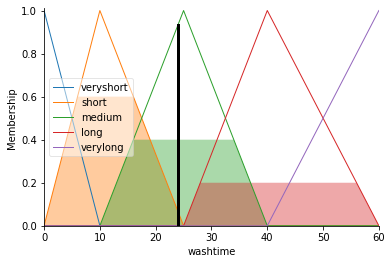

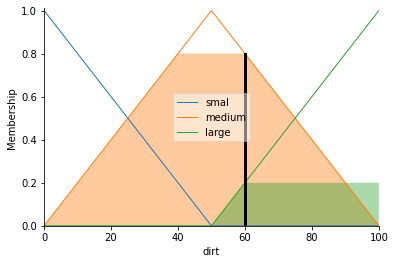

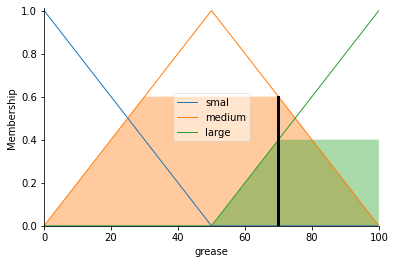

In [66]:
sim = fuzzyDemo()

## Igy is vissza lehet kapni az adott bemenet tagsággi függvényhez tartozó értékét

In [67]:
dirt.terms

OrderedDict([('smal', dirt[smal]),
             ('medium', dirt[medium]),
             ('large', dirt[large])])

In [68]:
# mfx = fuzzy.trimf(dirt.universe, [0, 10, 10])
mfx = dirt.__getitem__('medium').mf
print(mfx.shape)

# mik a tagsággi függvényhez tartozó értékek a következ pontokban (1, 2, 3.5, 5)
fuzzy.interp_membership(dirt.universe, mfx, [1.0, 2.0, 3.5, 5.0, 10])

(1001,)


array([0.02, 0.04, 0.07, 0.1 , 0.2 ])

In [69]:
print(dirt.__len__())
print(dirt.__getitem__('smal'))
a = dirt.__getitem__('smal')
print(type(a))
b = a.membership_value
print(type(b))
a.mf

# Elég bonyolultan de le lehet hívni bemenet1 objektumból a magát a tagsági függvényt (mf)
fuzzy.interp_membership(dirt.universe, dirt.__getitem__('smal').mf, [1, 2, 3.5, 5])

1001
dirt[smal]
<class 'skfuzzy.control.term.Term'>
<class 'skfuzzy.control.state.StatePerSimulation'>


array([0.98, 0.96, 0.93, 0.9 ])

In [70]:
# ide kéne egy olyan plotot raknom ami mutatja az adott függvényt,
# és mutatja az egyes x, hez tartozó értéket minkét (ha egynél több átviteli függvényhez is tartozik az y)

OrderedDict([('smal', dirt[smal]), ('medium', dirt[medium]), ('large', dirt[large])])
dirt['smal'](3) : 	0.40
dirt['medium'](3) : 	0.60
dirt['large'](3) : 	0.00


Text(301, 0.0, '0.00')

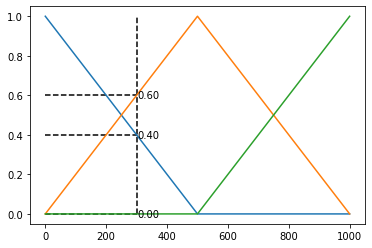

In [71]:
plt.plot(dirt['smal'].mf)
plt.plot(dirt['medium'].mf)
plt.plot(dirt['large'].mf)

print(dirt.terms)

x = 30
_x = x * 10

# Elég bonyolultan de le lehet hívni bemenet1 objektumból a magát a tagsági függvényt (mf)
y_dirt_smal    = fuzzy.interp_membership(dirt.universe, dirt.__getitem__('smal').mf, [x])
y_dirt_medium  = fuzzy.interp_membership(dirt.universe, dirt.__getitem__('medium').mf, [x])
y_dirt_large   = fuzzy.interp_membership(dirt.universe, dirt.__getitem__('large').mf, [x])


print("dirt['smal'](3) : \t{0:0.2f}".format(y_dirt_smal[0]))
print("dirt['medium'](3) : \t{0:0.2f}".format(y_dirt_medium[0]))
print("dirt['large'](3) : \t{0:0.2f}".format(y_dirt_large[0]))

plt.vlines(_x, ymin = 0, ymax = 1, colors = 'k', linestyles = 'dashed')

plt.hlines(y_dirt_smal, xmin = 0, xmax = _x, colors = 'k', linestyles = 'dashed')
plt.hlines(y_dirt_medium, xmin = 0, xmax = _x, colors = 'k', linestyles = 'dashed')
plt.hlines(y_dirt_large, xmin = 0, xmax = _x, colors = 'k', linestyles = 'dashed')

plt.text(_x + 1, y_dirt_smal[0], '{:0.2f}'.format(y_dirt_smal[0]), verticalalignment = 'center')
plt.text(_x + 1, y_dirt_medium[0], '{:0.2f}'.format(y_dirt_medium[0]), verticalalignment ='center')
plt.text(_x + 1, y_dirt_large[0], '{:0.2f}'.format(y_dirt_large[0]), verticalalignment ='center')


## Defuzzify this membership function five ways

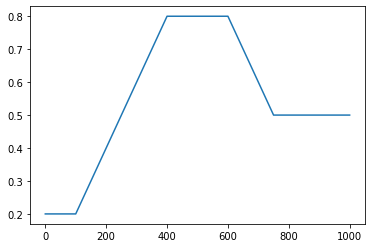

In [77]:
dirt_smal = dirt.__getitem__('smal').mf.copy()
dirt_medium = dirt.__getitem__('medium').mf.copy()
dirt_large  = dirt.__getitem__('large').mf.copy()

smal_illetekessegi_szint = 0.2
medium_illetekessegi_szint = 0.8
large_illetekessegi_szint = 0.5

dirt_smal[dirt_smal > smal_illetekessegi_szint] = smal_illetekessegi_szint
dirt_medium[dirt_medium > medium_illetekessegi_szint] = medium_illetekessegi_szint
dirt_large[dirt_large > large_illetekessegi_szint] = large_illetekessegi_szint

# maximum aggregáció alkalmazásával
aggregalt_mf = np.maximum(dirt_smal, dirt_medium)
aggregalt_mf = np.maximum(aggregalt_mf, dirt_large)
plt.plot(aggregalt_mf)

ymax  = [0.8, 0.8, 0.8, 0.8, 0.8]
xvals = [53.868778280542884, 53.28124999999997, 50.0, 40.0, 60.0]


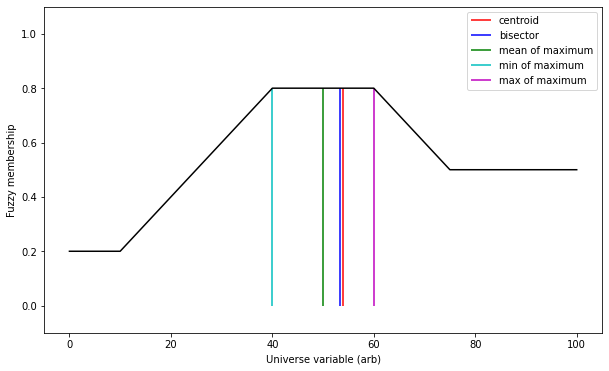

In [78]:
mx  = np.arange(0, 100.1, 0.1)

defuzz_centroid = fuzzy.defuzz(mx, aggregalt_mf, 'centroid')
defuzz_bisector = fuzzy.defuzz(mx, aggregalt_mf, 'bisector')
defuzz_mom = fuzzy.defuzz(mx, aggregalt_mf, 'mom')
defuzz_som = fuzzy.defuzz(mx, aggregalt_mf, 'som')
defuzz_lom = fuzzy.defuzz(mx, aggregalt_mf, 'lom')

names = [defuzz_centroid, defuzz_bisector, defuzz_mom, defuzz_som, defuzz_lom]


# Collect info for vertical lines
labels = ['centroid', 'bisector', 'mean of maximum', 'min of maximum',
          'max of maximum']
xvals = [defuzz_centroid,
         defuzz_bisector,
         defuzz_mom,
         defuzz_som,
         defuzz_lom]
colors = ['r', 'b', 'g', 'c', 'm']
ymax = [fuzzy.interp_membership(mx, aggregalt_mf, i) for i in xvals]

print('ymax  =', ymax)
print('xvals =', xvals)


#  Display and compare defuzzification results against membership function
plt.figure(figsize=(10, 6))

plt.plot(mx, aggregalt_mf, 'k')
for xv, y, label, color in zip(xvals, ymax, labels, colors):
    plt.vlines(xv, 0, y, label=label, color=color)
plt.ylabel('Fuzzy membership')
plt.xlabel('Universe variable (arb)')
plt.ylim(-0.1, 1.1)
plt.legend(loc=1)

plt.show()

In [79]:
for key in dirt.terms.keys():
  print(key)

smal
medium
large


dirt['smal'](3) : 	0.40
dirt['medium'](3) : 	0.60
dirt['large'](3) : 	0.00


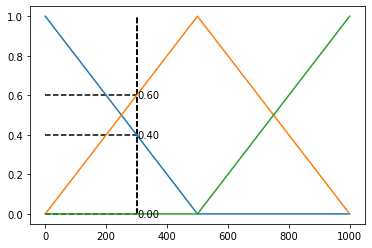

In [80]:
for key in dirt.terms.keys():
  plt.plot(dirt[key].mf)

  x = 30
  _x = x * 10

  value = fuzzy.interp_membership(dirt.universe, dirt.__getitem__(key).mf, [x])

  print("dirt['{0}'](3) : \t{1:0.2f}".format(key, value[0]))

  plt.vlines(_x, ymin = 0, ymax = 1, colors = 'k', linestyles = 'dashed')
  plt.hlines(value, xmin = 0, xmax = _x, colors = 'k', linestyles = 'dashed')
  plt.text(_x + 1, value[0], '{:0.2f}'.format(value[0]), verticalalignment = 'center')


In [81]:
washtime.defuzzify_method = 'centroid'

IF dirt[medium] AND grease[medium] THEN washtime[short]
	AND aggregation function : fmin
	OR aggregation function  : fmax
IF dirt[medium] AND grease[large] THEN washtime[medium]
	AND aggregation function : fmin
	OR aggregation function  : fmax
IF dirt[large] AND grease[medium] THEN washtime[medium]
	AND aggregation function : fmin
	OR aggregation function  : fmax
IF dirt[large] AND grease[large] THEN washtime[long]
	AND aggregation function : fmin
	OR aggregation function  : fmax
------------------------------------------
washtime  : 24.0065359477125
------------------------------------------
dirt : 60
grease : 70



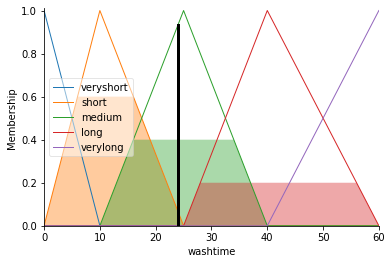

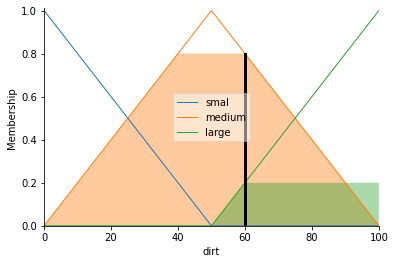

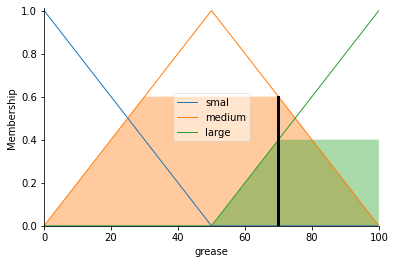

In [82]:
sim = fuzzyDemo()

In [86]:
washtime.defuzzify_method = 'centroid'

f = interact(fuzzyDemo, dirt_ = (0, 100), grease_ = (0, 100));

interactive(children=(IntSlider(value=60, description='dirt_'), IntSlider(value=70, description='grease_'), Ou…

In [87]:
washtime.defuzzify_method = 'lom'

f = interact(fuzzyDemo, dirt_ = (0, 100), grease_ = (0, 100));

interactive(children=(IntSlider(value=60, description='dirt_'), IntSlider(value=70, description='grease_'), Ou…

### Eddig jó

Az már kiderült, hogy a kimenet.defuzzyfy_method = 'som' segítségével meg tudom adni, hogy milyen defuzzifikációs eljárással számolja ki az eredményeket és ez működik is.

Most csináljunk egy rövidített interaktív demot ahol a defuzzifikáció módja is állítható paraméter.

In [88]:
def fuzzyDemoA(dirt_ = 60, grease_ = 70, mode_ = ['centroid']):

  # set defuz
  washtime.defuzzify_method = mode_

  # négy szabályunk van
  system = ctrl.ControlSystem([rule1, rule2, rule3, rule4])

  simulation = ctrl.ControlSystemSimulation(system)

  simulation.input['dirt'] = dirt_
  simulation.input['grease'] = grease_

  simulation.compute()

  print('------------------------------------------')
  print('washtime  :', simulation.output['washtime'])
  print('------------------------------------------')
  print(simulation.input)

  washtime.view(sim = simulation)
  dirt.view(sim = simulation)
  grease.view(sim = simulation)
  
  return simulation

In [89]:
f = interact(fuzzyDemoA, dirt_ = (0, 100), grease_ = (0, 100), mode_ = ['centroid','bisector', 'mom', 'som', 'lom']);

interactive(children=(IntSlider(value=60, description='dirt_'), IntSlider(value=70, description='grease_'), Dr…

## A teljes kimeneti tér ábrázolása a két bemeneti változó függvényében

In [94]:

# A kiértékelés nagyobb felbontással is elvégezhető de több számítással jár

dirt_space   = np.linspace(1, 100, 100)
grease_space = np.linspace(1, 100, 100)

x, y = np.meshgrid(dirt_space, grease_space)
z = np.zeros_like(x)

# Setup Defuz
washtime.defuzzify_method = 'centroid'

# Setup system
system = ctrl.ControlSystem([rule1, rule2, rule3, rule4])
simulation = ctrl.ControlSystemSimulation(system)

# Loop through the system 10*10 times to collect the control surface
for i in range(len(dirt_space)):
  for j in range(len(grease_space)): 
    simulation.input['dirt'] = x[i, j]
    simulation.input['grease'] = y[i, j]
    simulation.compute()
    z[i, j] = simulation.output['washtime']

In [95]:
# Plot the result in pretty 3D with alpha blending
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

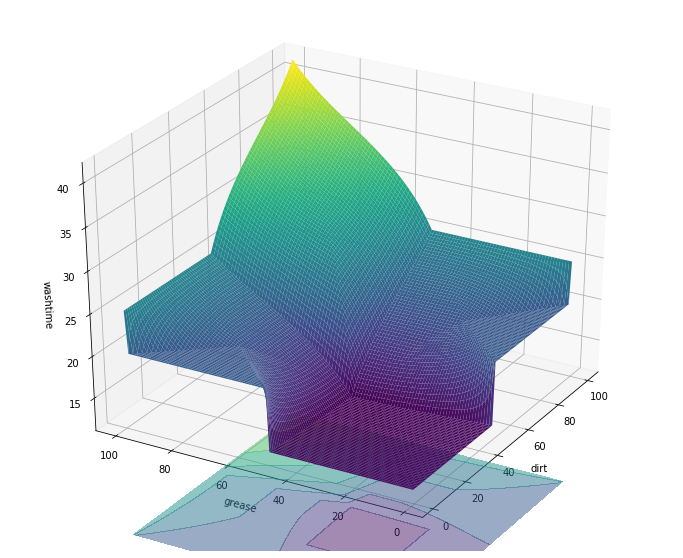

In [97]:
# Plot the result in pretty 3D with alpha blending

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('dirt')
ax.set_ylabel('grease')
ax.set_zlabel('washtime')

surf = ax.plot_surface(x, y, z, rstride = 1, cstride = 1, cmap = 'viridis', linewidth = 0.4, antialiased = True)

cset = ax.contourf(x, y, z, zdir = 'z', offset = -2.5, cmap = 'viridis', alpha = 0.5)

ax.view_init(30, 210)


```
# Köszönöm a figyelmet
```

```
     Istvan Pintye
     ---------------------------------------------------------
     MTA SZTAKI Computer and Automation Research Institute
                Hungarian Academy of Sciences,
     Laboratory of Parallel and Distributed Systems
     Postal    : P.O.Box 63. H-1518 Budapest, Hungary
     Location  : 1132 Budapest Victor Hugo u. 18-22. Hungary
     Phone/Fax : +36 1 329-78-64 (secretary)
     Mobile    : +36 30 822-5188
     E-mail    : pintye@sztaki.hu
     ---------------------------------------------------------
```

